In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Baca data iris
df = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Cek missing values
print("Missing Attribute Values:", "None" if df.isnull().sum().sum() == 0 else df.isnull().sum().sum())

# Hitung statistik deskriptif
stats = pd.DataFrame({
    'Min': df.iloc[:, 0:4].min(),
    'Max': df.iloc[:, 0:4].max(),
    'Mean': df.iloc[:, 0:4].mean().round(2),
    'SD': df.iloc[:, 0:4].std().round(2)
})

# Hitung korelasi dengan class (menggunakan Label encoding untuk species)
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

correlations = []
for column in df.columns[0:4]:
    correlation = df[column].corr(df['species_encoded'])
    correlations.append(round(correlation, 4))

stats['Class Correlation'] = correlations

# Format output dengan header
print("\nSummary Statistics:")
print(f"{'Attribute':12} {'Min':<5} {'Max':<5} {'Mean':<5} {'SD':<5} {'Class Correlation'}")
for index, row in stats.iterrows():
    correlation_text = f"{row['Class Correlation']:.4f}"
    if abs(row["Class Correlation"]) > 0.8:
        correlation_text += " (high!)"
    print(f"{index:12} {row['Min']:<5.1f} {row['Max']:<5.1f} {row['Mean']:<5.2f} {row['SD']:<5.2f} {correlation_text}")

Missing Attribute Values: None

Summary Statistics:
Attribute    Min   Max   Mean  SD    Class Correlation
sepal_length 4.3   7.9   5.84  0.83  0.7826
sepal_width  2.0   4.4   3.05  0.43  -0.4194
petal_length 1.0   6.9   3.76  1.76  0.9490 (high!)
petal_width  0.1   2.5   1.20  0.76  0.9565 (high!)


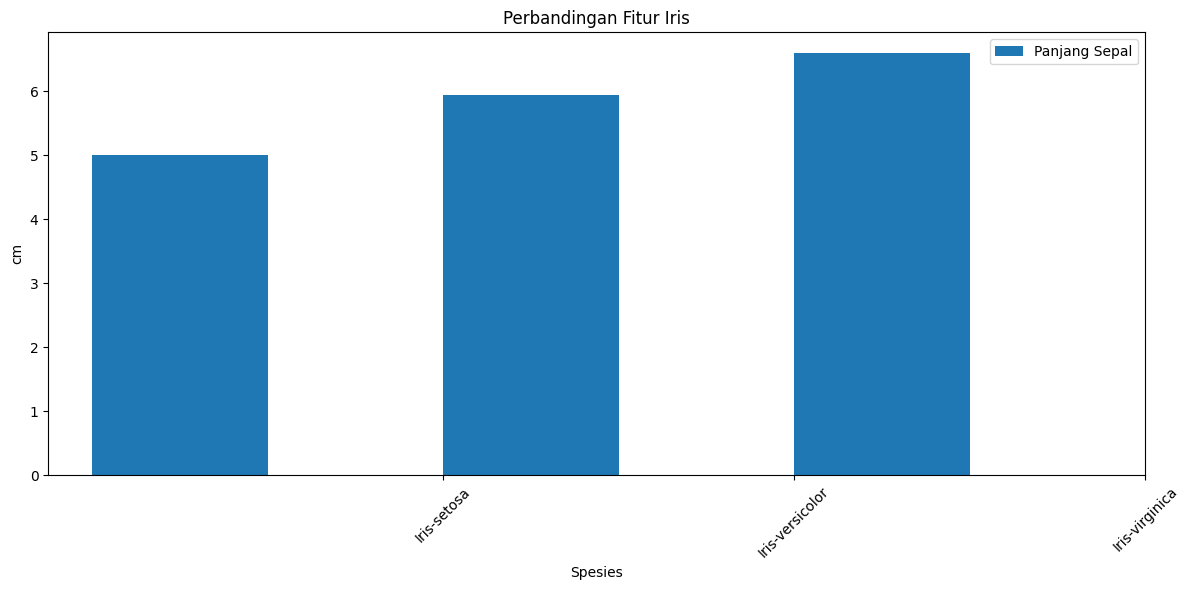

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung rata-rata fitur berdasarkan kelas
feature_means = df.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
x = np.arange(len(feature_means.index))
width = 0.5

# Membuat diagram batang
plt.figure(figsize=(12, 6))
plt.bar(x - width*1.5, feature_means['sepal_length'], width, label='Panjang Sepal')
# plt.bar(x - width*0.5, feature_means['sepal_width'], width, label='Lebar Sepal')
# plt.bar(x + width*0.5, feature_means['petal_length'], width, label='Panjang Petal')
# plt.bar(x + width*1.5, feature_means['petal_width'], width, label='Lebar Petal')

plt.xlabel('Spesies')
plt.ylabel('cm')
plt.title('Perbandingan Fitur Iris')
plt.xticks(x, feature_means.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

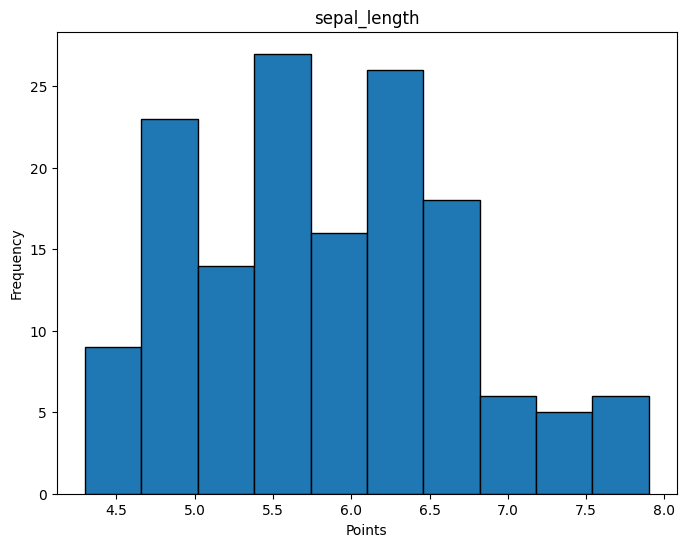

In [4]:
import matplotlib.pyplot as plt

# Plot histogram untuk sepal_length
plt.figure(figsize=(8, 6))
plt.hist(df['sepal_length'], bins=10, edgecolor='black')
plt.title('sepal_length')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

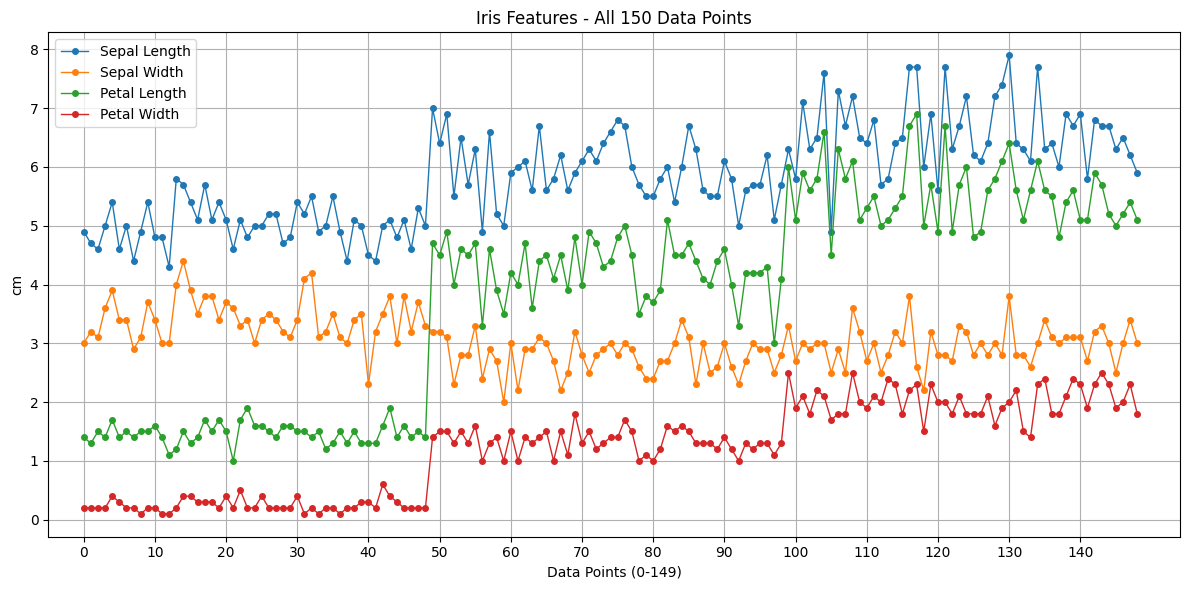

In [5]:
# Load dataset dari file CSV
df = pd.read_csv('iris.csv')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Grafik Garis untuk 150 data
plt.figure(figsize=(12, 6))

# Reset index untuk memastikan plot menggunakan indeks 0-149
df_reset = df.reset_index()

# Plot setiap feature
plt.plot(df_reset.index, df_reset['sepal_length'], marker='o', label='Sepal Length', linewidth=1, markersize=4)
plt.plot(df_reset.index, df_reset['sepal_width'], marker='o', label='Sepal Width', linewidth=1, markersize=4)
plt.plot(df_reset.index, df_reset['petal_length'], marker='o', label='Petal Length', linewidth=1, markersize=4)
plt.plot(df_reset.index, df_reset['petal_width'], marker='o', label='Petal Width', linewidth=1, markersize=4)

# Kustomisasi grafik
plt.xlabel('Data Points (0-149)')
plt.ylabel('cm')
plt.title('Iris Features - All 150 Data Points')
plt.legend()
plt.grid(True)

# Mengatur batasan sumbu x agar dimulai dari 0 sampai 149
plt.xlim(-5, 154)

# Menambahkan ticks pada sumbu x setiap 10 data points
plt.xticks(np.arange(0, 150, 10))

plt.tight_layout()
plt.show()

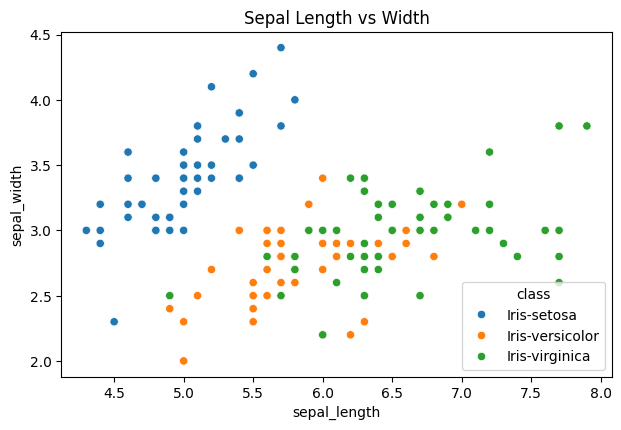

In [6]:
fig = plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='class')
plt.title('Sepal Length vs Width')

plt.tight_layout()
plt.show()